### T cell subset from annotated PICA dataset

### Load data into AnnData object

In [7]:
import scanpy as sc
import anndata as ad
import scanpy.external as sce
import pandas as pd
import matplotlib.pyplot as plt
import scvi
import torch

sc.settings.figdir = "/Users/jessica/Documents/GitHub/Jessica_notebooks/figures/batch1/preprocessing"


In [8]:
adata1 = ad.read_h5ad('../../Data/batch1/batch_integration_1-3_cd4_t_subset_batch1.h5ad')

In [9]:
sc.set_figure_params(dpi=50, facecolor="white")

In [10]:
print(adata1.obs["pica_id"].value_counts())
adata1

pica_id
PICA0001    2407
PICA0007    1879
PICA0006    1633
PICA0003    1216
PICA0004    1214
PICA0002    1022
PICA0005     688
Name: count, dtype: int64


AnnData object with n_obs × n_vars = 10059 × 38606
    obs: 'status', 'assignment', 'pica_id', 'pool_id', 'sequencing_batch', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'log1p_total_counts_ribo', 'pct_counts_ribo', 'total_counts_hb', 'log1p_total_counts_hb', 'pct_counts_hb', 'status_manual', 'cell_type', 'status_manual_01_b_subset', 'broad_cell_type', 'cell_type_01_b_cell', 'cell_type_01_b_cell_corrected', 'cell_type_02_t_cell_broad', 'cell_type_03_t_cell_subtype', 'cell_type_04_myeloid_subset'
    var: 'gene_ids', 'feature_types', 'genome', 'mt', 'ribo', 'hb', 'n_cells_by_counts-0', 'mean_counts-0', 'log1p_mean_counts-0', 'pct_dropout_by_counts-0', 'total_counts-0', 'log1p_total_counts-0', 'n_cells_by_counts-1', 'mean_counts-1', 'log1p_mean_

### Define Mt, Rb, Hb genes
### Calculate QC metrics
data was given with genes defined and stored in adata.obs, QC metrics calculated

### Visualize QC metrics

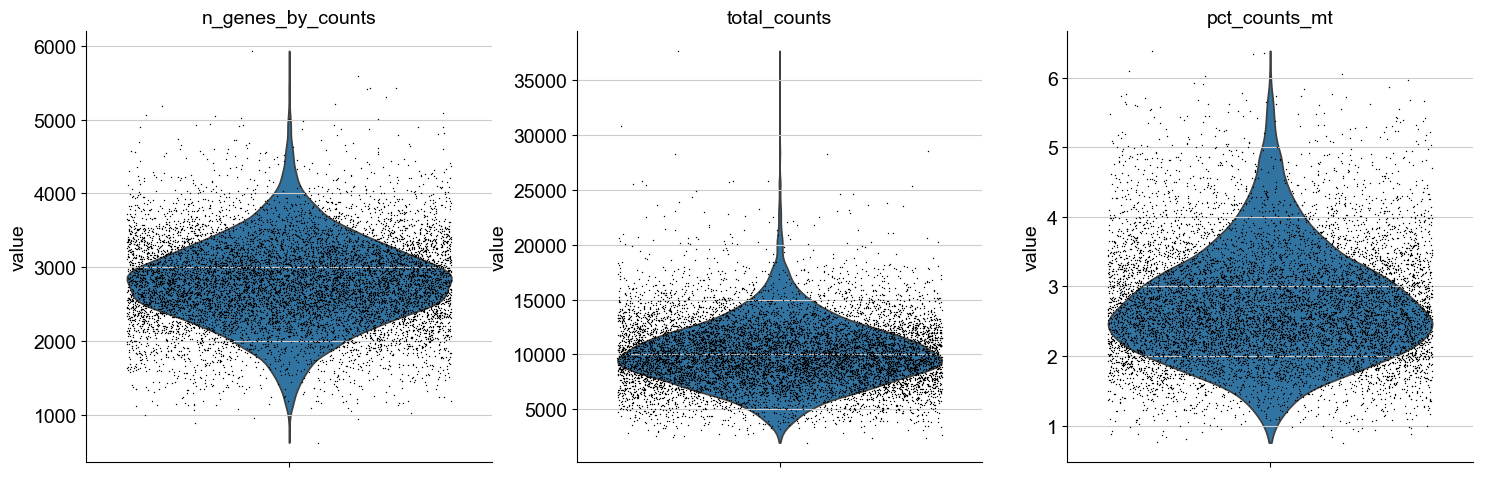

In [11]:
sc.pl.violin(adata1, ['n_genes_by_counts', 'total_counts', 'pct_counts_mt'], jitter=0.4, multi_panel=True)

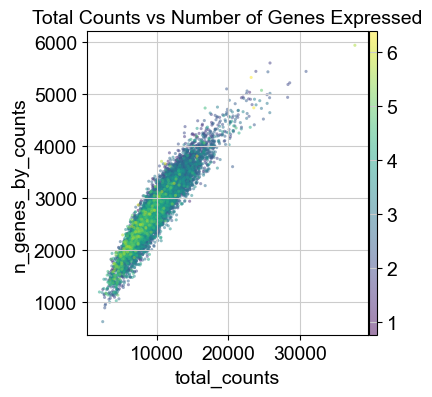

In [12]:
sc.pl.scatter(adata1, x='total_counts', y='n_genes_by_counts', color='pct_counts_mt', title='Total Counts vs Number of Genes Expressed', alpha=0.5, size=20)

### Filter to remove low quality cells/genes
Remove cells with less than 100 genes and remove genes not present in more than 3 cells
Remove cells that has more than 5% of mt expression


### Doublet detection
Scrublet
output: doublet_score and predicted_doublet in .obs
Use score during clustering to filter clusters with high doublet scores

### Normalization

In [13]:
adata1.layers['counts'] = adata.X.copy()  # Store raw counts in a separate layer
adata1

AnnData object with n_obs × n_vars = 10059 × 38606
    obs: 'status', 'assignment', 'pica_id', 'pool_id', 'sequencing_batch', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'log1p_total_counts_ribo', 'pct_counts_ribo', 'total_counts_hb', 'log1p_total_counts_hb', 'pct_counts_hb', 'status_manual', 'cell_type', 'status_manual_01_b_subset', 'broad_cell_type', 'cell_type_01_b_cell', 'cell_type_01_b_cell_corrected', 'cell_type_02_t_cell_broad', 'cell_type_03_t_cell_subtype', 'cell_type_04_myeloid_subset'
    var: 'gene_ids', 'feature_types', 'genome', 'mt', 'ribo', 'hb', 'n_cells_by_counts-0', 'mean_counts-0', 'log1p_mean_counts-0', 'pct_dropout_by_counts-0', 'total_counts-0', 'log1p_total_counts-0', 'n_cells_by_counts-1', 'mean_counts-1', 'log1p_mean_

In [14]:
sc.pp.normalize_total(adata1)  # default count to 1e4
sc.pp.log1p(adata1)

### Feature selection
Reduce dimensionality of dataset to only include informative genes

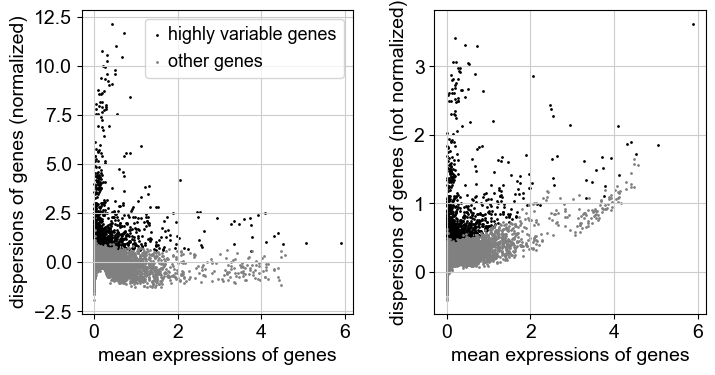

In [15]:
sc.pp.highly_variable_genes(adata1, n_top_genes=2000, batch_key='pica_id')
sc.pl.highly_variable_genes(adata1)

In [16]:
print(adata1.var.highly_variable.sum())

2000


## Dimensionality reduction
How many PCs to consider to compute neighbourhood relation of cells
Used in clustering function leiden()

In [17]:
sc.tl.pca(adata1)

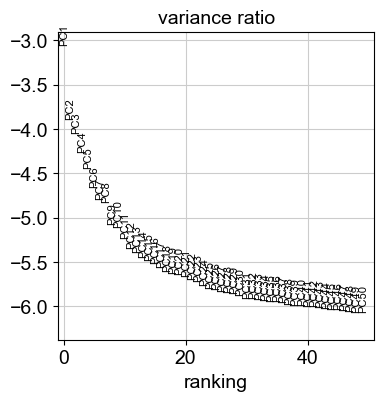

In [18]:
sc.pl.pca_variance_ratio(adata1, n_pcs=50, log=True)

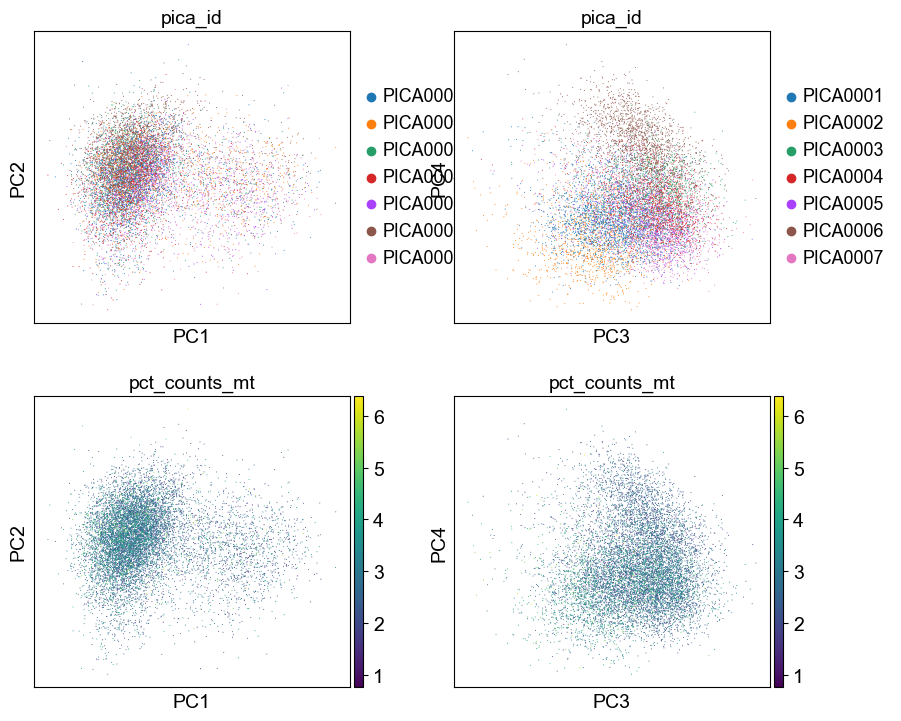

In [19]:
# Check PCA results for undesired technical artifacts like batch effects or mitochondrial stress
sc.pl.pca(
    adata1,
    color=["pica_id", "pica_id", "pct_counts_mt", "pct_counts_mt"],
    dimensions=[(0, 1), (2, 3), (0, 1), (2, 3)],
    ncols=2,
    size=2,
)

In [20]:
adata1.write("/Users/jessica/Documents/GitHub/Jessica_notebooks/data/batch1/preprocessed1.h5ad")